In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [2]:
# En particular las soluciones vivirán en R^n, n=[10,20,50]
n = [10,20,50]
N = 20*n[0]
M = 17*n[0]
# The domain of x_i is [-10,10] 
lower = -5.12
upper = 5.12
# Create an initial population
def init_population(chromosomes=N,gens=M,varmin=lower,varmax=upper):
    '''
    ABLE TO GENERATE A NEW POPULATION.
    chromosomes int. Number of solutions in the population.
    gens int. Number of elements for every solution.
    varmin float. Lower bound of the variable.
    varmax float. Upper bound of the variable.
    
    RETURN
    init_pop array. A new population with shape (chromosomes,gens)
    '''
    init_pop = np.zeros((chromosomes,gens))
    for chromosome in range(chromosomes):
        init_pop[chromosome,:] = np.random.uniform(varmin,varmax,gens)
    return init_pop

In [3]:
init_pop = init_population()
print(init_pop[0])
print(f'Initial population shape: {init_pop.shape}\n')

[ 3.08504282  0.12335568  1.5712564  -3.98784193 -3.67652877 -3.22272073
 -1.09989156 -5.0158417  -4.44951551  2.22856953 -0.09926372 -0.58780225
  3.91057909  4.06678602 -3.17773237 -2.85771618  3.54371396  3.87889643
  3.03254518 -4.55773519  4.92285786 -3.61639831  1.44493577 -1.52044472
 -1.07297093 -1.99805876 -2.14312379 -4.30860119  4.68291416 -5.10694906
 -3.54960433 -4.44785101 -1.03354884 -3.53109155  0.00622157 -1.37677557
  3.92537296  0.64752618 -3.06072462 -0.69779601  2.77954456  3.79840241
 -4.34781806 -1.81245422 -1.73871918  1.61461996 -3.22985081  2.77448095
 -3.96048285 -4.52222639 -0.61478368 -3.18423005  3.27510581  0.49452218
  1.79491377  2.17188285 -4.91920197 -4.58853058 -5.02210986 -3.39172746
  0.55257718  1.0447526  -2.04182634  1.98249933 -3.22818453 -0.20497325
 -5.03986399 -1.45633192  2.96235502 -3.34988859 -3.24660978 -4.88307104
  2.94743879  2.98397288 -1.25279177 -1.02885363  1.49042564 -2.01067267
  1.03946681 -4.58199119 -3.9563959   3.9824691   3

In [3]:
# Our error function will be a sphere function
def error(x):
    return sum(x**2)

In [4]:
# Elitism
def evaluation(population,function):
    '''
    ABLE TO EVALUATE THE FUNCTION FOR EVERY CHROMOSOME IN THE POPULATION.
    population array. The set of solutions.
    function function. The error function
    
    RETURN
    qualities array. Every chromosome evaluated on fitness function.
    '''
    qualities = np.zeros(population.shape[0])
    for chromosome in range(population.shape[0]):
        qualities[chromosome] = function(population[chromosome,:])
    return qualities

In [6]:
evaluated = evaluation(init_pop,error)
evaluated

array([1579.08003867, 1569.9000605 , 1483.96823069, 1380.93461315,
       1547.56569874, 1663.89408677, 1453.71051327, 1385.33204192,
       1354.17043537, 1596.41559314, 1403.1246861 , 1379.02061116,
       1496.5068931 , 1368.35455424, 1595.90480389, 1383.24324069,
       1284.00413746, 1535.32586412, 1506.0817706 , 1249.8882138 ,
       1471.51908581, 1368.37658815, 1377.7624035 , 1645.81770814,
       1370.36769967, 1569.48521133, 1399.8190102 , 1320.20213163,
       1545.84183378, 1453.91434907, 1509.72568545, 1586.56803467,
       1502.25462264, 1523.57231041, 1396.60772239, 1414.33050019,
       1404.78511401, 1746.24936971, 1264.56626773, 1501.44728661,
       1534.94076984, 1197.98227594, 1301.63091593, 1410.47319449,
       1380.13383038, 1578.75998777, 1420.2170233 , 1465.73140841,
       1481.82859031, 1356.31356607, 1685.02198519, 1390.51760234,
       1591.25208276, 1632.63228887, 1584.71691596, 1470.43859655,
       1396.58493124, 1580.30338501, 1528.0487293 , 1499.39365

In [262]:
np.max(evaluated)

1778.8044575107972

In [5]:
# Selection
def selection(n_parents,population,evaluated):
    '''
    ABLE TO SELECT THE n_parents BESTS SOLUTIONS.
    n_parents int. Number of parents.
    population array. All solutions of a generation.
    evaluated array. Every solution evaluated on the fitness function.
    
    RETURN
    parents array. A set of (n_parents,gens).
    '''
    parents = np.empty((n_parents,population.shape[1]))
    evals = evaluated.copy()
    best_index = 0
    worst_index = 0
    for parent in range(n_parents):
        # Best (min) quality parents
        if parent in [x for x in range(n_parents)]:
            best_quality_index = np.where(np.min(evals) == evals)[0][0]
            worst_quality_index = np.where(np.max(evals) == evals)[0][0]
            parents[parent,:] = population[best_quality_index,:]
            evals[best_quality_index] = np.inf
            #print(min_quality_index)
    return parents,best_quality_index, worst_quality_index

In [8]:
n_parents = N//2
parents = selection(n_parents,init_pop,evaluated)
print(parents)
print(parents.shape)

[[ 4.86231467  2.17709949 -3.10584369 ... -3.41198701 -0.23518382
  -3.89451251]
 [-2.39455203  4.53153828 -0.38594851 ...  4.44712691 -0.07393341
  -3.34695484]
 [ 0.13819765  0.18995422  1.49813845 ...  4.33554532 -3.72467751
   0.09432344]
 ...
 [ 2.69054779 -2.10585591 -1.43639368 ... -2.59928095 -1.7866213
   1.45641047]
 [ 2.74837093  0.28073548  3.21898481 ...  1.38221916 -1.78567048
   0.04920921]
 [-0.43755145 -2.88836633 -0.80558233 ... -0.78670182  2.06415742
   0.24114148]]
(100, 170)


In [6]:
def termination_criteria(evaluated,e,iteration,itermax):
    '''
    THE ALGORITHM TERMINATES IF THE CRITERIA IS TRUE.
    '''
    return abs(np.max(evaluated) - np.min(evaluated)) <= e or iteration >= itermax

In [10]:
e = 1
pare= [5,80]
itermax = 10
iteration = 11

termination_criteria(pare,e,iteration,itermax)

True

In [18]:
# Crossover
def crossover(parents, cut=parents.shape[1]//2):
    childs = np.zeros(parents.shape)
    for i in range(0,a.shape[0],2):
        if i+1 < a.shape[0]:
            childs[i][:cut] = parents[i][:cut]
            childs[i][cut:] = parents[i+1][cut:]
            childs[i+1][:cut] = parents[i+1][:cut]
            childs[i+1][cut:] = parents[i][cut:]
    return childs

In [17]:
a = np.array(([1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]))
b = np.array(([10,20,30,40],[50,60,70,80],[90,100,110,120],[130,140,150,160]))
childs = crossover(a)
childs

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.],
       [13., 14., 15., 16.]])

In [40]:
cut=a.shape[1]//2
for i in range(0,a.shape[0],2):
    if i+1 < a.shape[0]:
        b[i][:cut] = a[i][:cut]
        b[i][cut:] = a[i+1][cut:]
        b[i+1][:cut] = a[i+1][:cut]
        b[i+1][cut:] = a[i][cut:]
print(b)

[[ 1  2  7  8]
 [ 5  6  3  4]
 [ 9 10 15 16]
 [13 14 11 12]]


In [13]:
b[0][:2] = a[0][:2]
b[0][2:] = a[1][2:]
b[1][:2] = a[1][:2]
b[1][2:] = a[0][2:]
b

array([[  1,   2,   7,   8],
       [  5,   6,   3,   4],
       [ 90, 100, 110, 120],
       [130, 140, 150, 160]])

In [14]:
b[2][:2] = a[2][:2]
b[2][2:] = a[3][2:]
b[3][:2] = a[3][:2]
b[3][2:] = a[2][2:]
b

array([[ 1,  2,  7,  8],
       [ 5,  6,  3,  4],
       [ 9, 10, 15, 16],
       [13, 14, 11, 12]])

In [12]:
# Mutation
def mutation(childs,p1=5,p2=10):
    for child in range(childs.shape[0]):
        rand1 = np.random.uniform(0,100)
        #print(rand1)
        if rand1 <= p1:
            for gen in range(childs.shape[1]):
                rand2 = np.random.uniform(0,100)
                #print(rand2)
                if rand2 <= p2:
                    childs[child][gen] = np.random.uniform(lower,upper)
    return childs

In [247]:
childs

array([[ 1.,  2.,  7.,  8.],
       [ 5.,  6.,  3.,  4.],
       [ 9., 10., 15., 16.],
       [13., 14., 11.,  0.]])

In [258]:
mutated_childs = mutation(childs)
mutated_childs

4.350758684147349
29.812784147290593
9.139203238964
50.14011260781799
36.93359405686364
38.6294311013885
16.649313527593023
50.78375462619202


array([[ 1.        , -0.12419134,  7.        ,  8.        ],
       [ 5.        ,  6.        ,  3.        ,  4.        ],
       [ 9.        , 10.        , 15.        , 16.        ],
       [13.        , 14.        , 11.        ,  0.        ]])

# Genetic Algorithm for (Real) Global Optimization

In [13]:
# Parameters
n = [10,20,50] # dimension
N = 20*n[0] # number of chromosomes in the population
M = 17*n[0] # number of gens 
lower = -5.12 # lower bound (The domain of x_i is [-5.12,5.12]) 
upper = 5.12 # upper bound 
n_parents = N//2
cutoff_point = M//2 # cutoff point for the crossover
e = 1 # epsilon for termination criteria
p1 = 5 # (%) probability of select a chromosome for mutation
p2 = 10 # (%) probability of select a gen for mutation
itermax = 3#200 # max generation

In [24]:
# INITIALIZATION
pop = init_population()
iteration = 0
finish = False
history = {}
bests = []
worsts = []
while not finish:
    # EVALUATE
    evaluated = evaluation(pop,error)
    # TERMINATION CHECK
    finish = termination_criteria(evaluated,e,iteration,itermax)
    # GENETIC OPERATIONS
    # selection
    parents,best_index, worst_index = selection(n_parents,pop,evaluated)
    bests.append(evaluated[best_index])
    worsts.append(evaluated[worst_index])
    history[f'gen: {iteration}'] = {'best':(evaluated[best_index],pop[best_index]),
                                 'worst':(evaluated[worst_index],pop[worst_index])}
    # crossover
    childs = crossover(parents, cutoff_point)
    # mutation
    mutated_childs = mutation(childs,p1,p2)
    # REPLACEMENT
    pop = np.concatenate((parents,childs))
    #print(parents)
    #print(f'nextpop{iteration}',pop.shape)
    # LOCAL TECHNIQUE
    # NEW GENERATION
    print(f'Generation {iteration}: ',f'\n\tBest:{evaluated[best_index]}',f'\n\tWorst:{evaluated[worst_index]}')
    iteration += 1

nextpop0 [[-1.30402227 -3.82031839  2.14289927 ... -3.98751934  0.45161153
  -1.11371678]
 [-0.28482568  2.60686007  2.51403314 ...  1.03808831 -1.71843661
  -2.75778334]
 [ 3.20713722 -3.8707646   0.06115218 ...  2.38586611 -0.82299154
  -3.00111706]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          4.06467764  0.         ...  0.         -4.62596189
   0.        ]]
Generation 0:  
	Best:1476.5199309040133 
	Worst:1460.645129907581
nextpop1 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Generation 1:  
	Best:1213.1449360029544 
	Worst:1204.2993463634898
nextpop2 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Generation 2:  
	Best:0.0 
	Worst:0.0
nextpop3 [[0

In [25]:
print(bests)
history

[1476.5199309040133, 1213.1449360029544, 0.0, 0.0]


{'gen: 0': {'best': (1476.5199309040133,
   array([ 1.27385625,  4.62874586,  1.54083074, -0.44606377,  0.01595125,
          -2.49935752,  0.62080036, -2.95372879,  2.11889481,  0.06996445,
           3.91300081,  2.05901061,  3.38438905, -2.1419227 ,  4.28978011,
           4.15359925, -5.0288125 , -2.37421531, -1.33069111,  3.41612145,
          -0.72364132,  3.39280166,  1.91446864,  2.8997004 , -0.05621581,
           0.32112266, -2.31095865,  0.62125569,  5.11792941,  4.8210626 ,
          -4.41501723,  1.96540209, -1.53838407, -2.10188183,  0.91261141,
           0.59086241, -1.58232323, -3.78647195, -4.33784633,  1.88020575,
          -5.07574708, -2.7431941 ,  0.49008442, -3.1261391 ,  1.51674173,
          -4.62099168, -2.73460715, -0.46234859,  2.00277697, -1.19278724,
           3.77689391, -2.58403188, -3.41353002,  1.55914978,  1.92386355,
           3.3179567 ,  4.74566759, -1.33445069,  1.12947679,  1.82851194,
          -4.83186065,  4.00928955, -3.04676621, -0.1221185

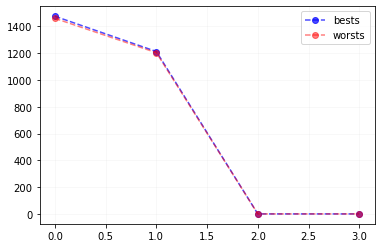

In [47]:
plt.plot([x for x in range(len(bests))],bests,'b--o',alpha=0.7)
plt.plot([x for x in range(len(worsts))],worsts,'r--o',alpha=0.5)
plt.grid(True,alpha=0.1)
plt.legend(('bests','worsts'))
plt.show()